# Detección de Anomalías con Isolation Forest

En este notebook, exploraremos cómo usar Isolation Forest para detectar anomalías en un conjunto de datos.

## ¿Qué es Isolation Forest?

Isolation Forest es un algoritmo diseñado específicamente para detectar anomalías basándose en la idea de que:
- Las anomalías son más fáciles de aislar que los puntos normales.
- Utiliza árboles de aislamiento para dividir el espacio de los datos y calcular una puntuación de anomalía para cada punto.

## Paso 1: Generar un Dataset de Ejemplo

Crearemos un conjunto de datos que incluya puntos normales y algunas anomalías.

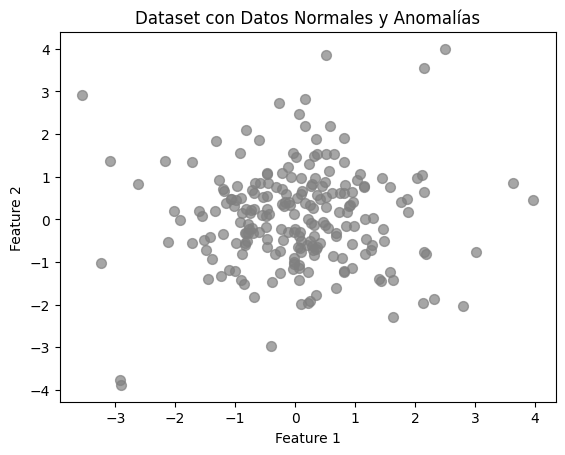

In [1]:

# Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt

# Generar datos normales
np.random.seed(42)
normal_data = np.random.normal(0, 1, size=(200, 2))  # Datos normales

# Generar anomalías
anomalies = np.random.uniform(low=-4, high=4, size=(20, 2))  # Anomalías

# Combinar los datos
data = np.vstack([normal_data, anomalies])

# Visualizar el dataset
plt.scatter(data[:, 0], data[:, 1], c='gray', s=50, alpha=0.7)
plt.title('Dataset con Datos Normales y Anomalías')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


## Paso 2: Aplicar Isolation Forest

Usaremos el algoritmo Isolation Forest para detectar anomalías. El parámetro `contamination` se utiliza para definir el porcentaje esperado de anomalías.

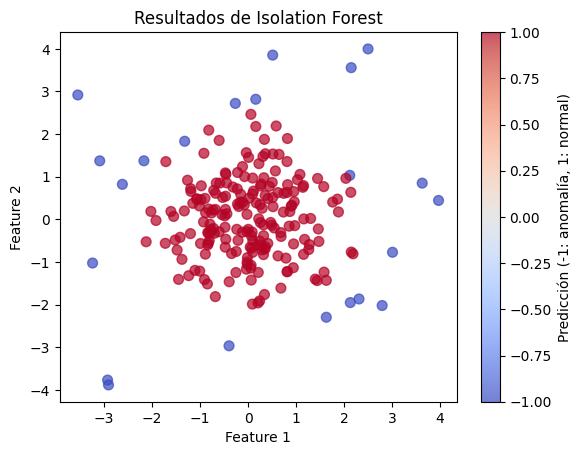

In [8]:

from sklearn.ensemble import IsolationForest

# Aplicar Isolation Forest
model = IsolationForest(contamination=0.1, random_state=42)  # Contamination = 10% anomalías
predictions = model.fit_predict(data)  # -1 para anomalías, 1 para normales
scores = model.decision_function(data)  # Puntuaciones de anomalía

# Visualizar resultados
plt.scatter(data[:, 0], data[:, 1], c=predictions, cmap='coolwarm', s=50, alpha=0.7)
plt.title('Resultados de Isolation Forest')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Predicción (-1: anomalía, 1: normal)')
plt.show()


## Paso 3: Evaluar la Efectividad del Modelo

Podemos analizar las puntuaciones de anomalía generadas por el modelo para interpretar los resultados.

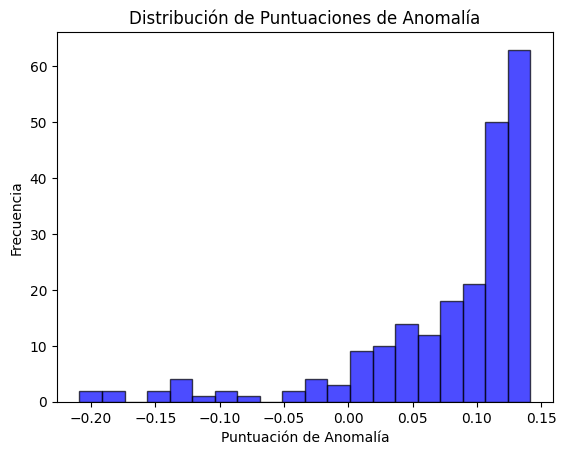

In [3]:

# Histograma de puntuaciones de anomalía
plt.hist(scores, bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribución de Puntuaciones de Anomalía')
plt.xlabel('Puntuación de Anomalía')
plt.ylabel('Frecuencia')
plt.show()


## Paso 4: Interpretar los Resultados

- **Predicciones:** Los puntos con predicción `-1` son considerados anomalías.
- **Puntuaciones de anomalía:** Valores más negativos indican puntos más anómalos.
- **Visualización:** Permite identificar claramente los puntos atípicos en el espacio.

## Conclusión

- Isolation Forest es una técnica eficiente para detectar anomalías en datos grandes.
- Es útil en aplicaciones como detección de fraudes, calidad de datos y sistemas industriales.
- Sin embargo, la selección de parámetros como `contamination` puede requerir experimentación.

# Cómo buscar los mejores parámetros?

In [10]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, silhouette_score
import numpy as np

# Definir una función personalizada para el Silhouette Score
def silhouette_scorer(estimator, X):
    predictions = estimator.fit_predict(X)
    if len(np.unique(predictions)) > 1:  # Evitar casos donde no haya clusters
        return silhouette_score(X, predictions)
    else:
        return -1  # Penalizar modelos que no producen clusters

# Definir el espacio de búsqueda de parámetros
param_grid = {
    "n_estimators": [50, 100, 200],       # Número de árboles
    "max_samples": ["auto", 0.5, 0.7],   # Tamaño de muestra
    "contamination": [0.05, 0.1, 0.2],   # Porcentaje esperado de anomalías
    "max_features": [1, 2]               # Número máximo de características
}

# Crear el modelo Isolation Forest
model = IsolationForest(random_state=42)

# Configurar el GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring=make_scorer(silhouette_scorer),
    cv=3,  # Número de particiones para validación cruzada
    verbose=1,
    n_jobs=-1  # Usar todos los procesadores disponibles
)

# Aplicar la búsqueda en los datos
grid_search.fit(data)

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

# Modelo optimizado
optimized_model = grid_search.best_estimator_


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Mejores parámetros encontrados:
{'contamination': 0.05, 'max_features': 1, 'max_samples': 'auto', 'n_estimators': 50}


c:\Python311\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [12]:
grid_search.best_estimator_

IsolationForest(contamination=0.05, max_features=1, n_estimators=50,
                random_state=42)

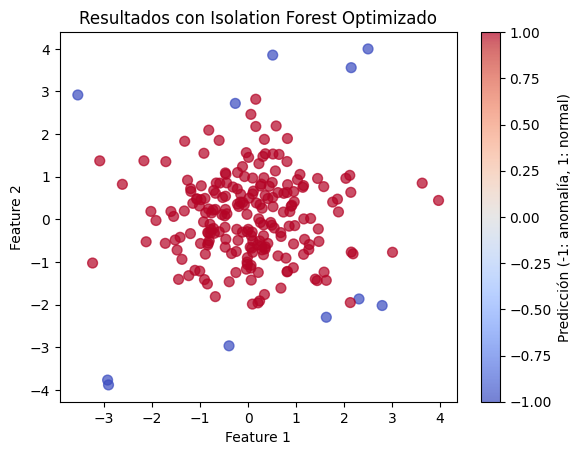

In [11]:
# Predicciones con el modelo optimizado
optimized_predictions = optimized_model.fit_predict(data)

# Visualizar resultados
import matplotlib.pyplot as plt
plt.scatter(data[:, 0], data[:, 1], c=optimized_predictions, cmap='coolwarm', s=50, alpha=0.7)
plt.title('Resultados con Isolation Forest Optimizado')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Predicción (-1: anomalía, 1: normal)')
plt.show()
